In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using a maze-generator found online

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead


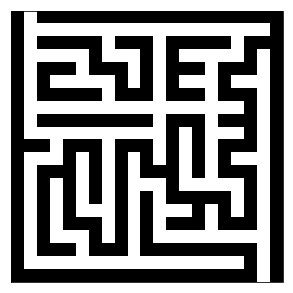

In [86]:
import numpy as np
from numpy.random import random_integers as rnd
import matplotlib.pyplot as plt
 
def maze(width=81, height=51, complexity=.75, density =.75):
    # Only odd shapes
    shape = ((height//2)*2+1, (width//2)*2+1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity*(5*(shape[0]+shape[1])))
    density    = int(density*(shape[0]//2*shape[1]//2))
    # Build actual maze
    Z = np.zeros(shape, dtype=bool)
    # Fill borders
    Z[0,:] = Z[-1,:] = 1
    Z[:,0] = Z[:,-1] = 1
    # Make isles
    for i in range(density):
        x, y = rnd(0,shape[1]//2)*2, rnd(0,shape[0]//2)*2
        Z[y,x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:           neighbours.append( (y,x-2) )
            if x < shape[1]-2:  neighbours.append( (y,x+2) )
            if y > 1:           neighbours.append( (y-2,x) )
            if y < shape[0]-2:  neighbours.append( (y+2,x) )
            if len(neighbours):
                y_,x_ = neighbours[rnd(0,len(neighbours)-1)]
                if Z[y_,x_] == 0:
                    Z[y_,x_] = 1
                    Z[y_+(y-y_)//2, x_+(x-x_)//2] = 1
                    x, y = x_, y_
                    
    for i in range(1, width-1):
        if Z[1,i] == 0:
            Z[0,i] = 0
            start = np.asarray([0, i])
            break

    for i in range(width-1, 1, -1):
        if Z[-2,i] == 0:
            Z[-1,i] = 0
            end = np.asarray([height-1, i])
            break
        
    return Z, start, end
 
test, start, end = maze(20,20)
plt.figure(figsize=(10,5))
plt.imshow(test,cmap=plt.cm.binary,interpolation='nearest')
plt.xticks([]),plt.yticks([])
plt.show()

In [95]:
print(test[0,0])

True


DONE 4373
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23 16 19 20 21 16 17  9  9  7  9  9 10 10 10 10 10 10  8  0]
 [ 0 15  0  0  0  0  0 15  0  0  0  6  0  0  0  0  0 10  0  0  0]
 [ 0 15  9  8  6  6  0 15 16 16  0  6  0 17 22 18 12 13  0  0  0]
 [ 0 10  0  0  0  6  0  0  0 24  0  6  0  0  0 18  0  0  0  0  0]
 [ 0 10  0  0  1  6  6  6  0 17  0  7  0 20 28 27  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  4  0  0  0  6  0  0  0 13  0  0  0  0  0]
 [ 0 13  5  5  6  4  4  7  6  6  5  8  9 11  9 29 27 19  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  3  0  0  0 21  0  0  0  0  0]
 [ 0  3  3  4  5  5  2  3  3  3  3  5  0 17  0 24 25 19  0  0  0]
 [ 0  0  0  4  0  0  0  5  0  0  0  3  0 29  0 20  0  0  0  0  0]
 [ 0  3  3  4  0  3  0  5  0  3  0  2  0 26  0 22  0  0  0  0  0]
 [ 0  3  0  0  0  5  0  2  0  6  0  0  0 22  0 26  0  0  0  0  0]
 [ 0  3  0  8  0  3  0  2  0  9  8 12  0 17 20 32 16 19  0  0  0]
 [ 0  4  0 12  0  2  0  2  0  9  0 11  0  0  0  0  0 27  0  0  0]


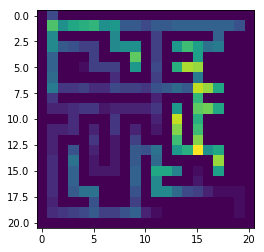

In [141]:
#Try to use monte carlo methods to find a route through the maze
#2 different Monte-Carlo criteria: more likely to select a move that takes it closer to the exit
#If the walker is already on a new route, it is less likely to consider a move to a previously visited square

def distance(cur, end):
    return (np.sqrt((cur[0] - end[0])**2 + (cur[1] - end[1])**2))

pathx = []
pathy = []
visited = np.zeros_like(test, dtype=int)
dx = [-1, 0, 1, 0]; dy = [0, -1, 0, 1]
cur = np.zeros_like(start)
cur[:] = start
visited[cur[0], cur[1]] = 1
for i in range(1000000):
    a = np.random.choice(range(4))
    #Determine possible moves
    open_spaces = []
    for j in range(4):
        if test[cur[0] + dy[j], cur[1] + dx[j]] == False:
            open_spaces.append(j)
    r = np.random.choice(open_spaces)
    proposal = np.asarray([cur[0] + dy[r], cur[1] + dx[r]])

    if visited[proposal[0], proposal[1]] < visited[cur[0], cur[1]]:
        cur[:] = proposal
        pathx.append(proposal[1])
        pathy.append(proposal[0])
        visited[cur[0], cur[1]] += 1
    else:
        cd = distance(cur, end)
        pd = distance(proposal, end)
        r1 = 7*np.abs( pd - cd)/cd
        if r1 > np.random.random():
            cur[:] = proposal
            pathx.append(proposal[1])
            pathy.append(proposal[0])
            visited[cur[0], cur[1]] += 1
    if (cur[0] == end[0] and cur[1] == end[1]):
        print('DONE', i)
        break
        
            
plt.imshow(visited)
print(visited)

1.75561097257 4058.04987531 -14.2443890274 17734.0498753


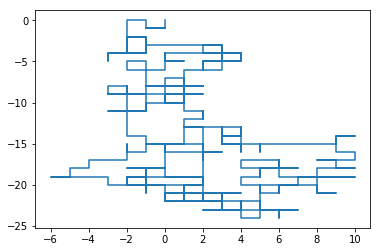

In [119]:
#Determine the variance in both x and y of a 2D random walker with equal prob. of walking in any direction

x_vals = [0]
y_vals = [0]

x = 0; y = 0
dx = [-1, 0, 1, 0]; dy = [0, 1, 0, -1]

#Look at 1000 walkers
for w in range(1):
    #Let each walker take 400 steps
    for s in range(400):
        i = np.random.choice(range(4))
        x += dx[i]
        y += dy[i]
        x_vals.append(x)
        y_vals.append(y)
        
plt.plot(x_vals, y_vals)
        
x_mean = np.mean(np.asarray(x_vals))
y_mean = np.mean(np.asarray(y_vals))

x_var = np.sum((x_vals - x_mean)**2)
y_var = np.sum((y_vals - y_mean)**2)

print(x_mean, x_var, y_mean, y_var)

C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


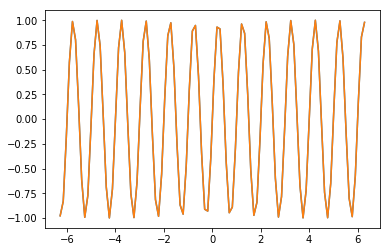

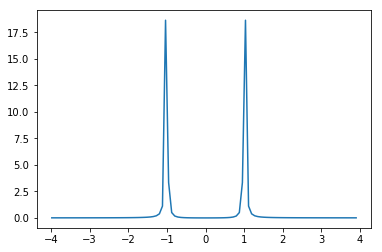

In [127]:
def fftFreqFix(data, freq, t):
    ''' Takes np.fft.fftfreq frequency data and turns it into the appropriate frequency values for the spectrum
    INPUT:
        data = the data that was transformed
        freq = the output of fftFreq
        t    = the time spectrum associated with the data
    OUTPUT:
        freq = the re-calibrated frequency data'''
    
    T = t[-1] - t[0]
    df = 1/T
    N = data.size
    freq = freq*df*N
    
    return freq


x = np.linspace(-2*np.pi, 2*np.pi, 100)
sx = np.sin(2*np.pi*x)
plt.figure(0)
plt.plot(x, sx)

ts = np.fft.fft(sx, norm='ortho')
freq = np.fft.fftfreq(x.size)
fixfreq = np.fft.fftshift(freq)
fixfreq = fftFreqFix(sx, fixfreq, x)
fixts = np.fft.fftshift(ts)
plt.figure(1)
plt.plot(fixfreq, np.abs(fixts**2))

trans = np.fft.ifft(ts, norm='ortho')
plt.figure(0)
plt.plot(x,trans)

## EM wave example

In [ ]:
import scipy.signal, scipy.misc

def fdB():
    r = dt/(2*h)
    
    kernel = np.zeros((3,3,3))
    kernel[]
    Bx_new = Bz
                
    
def fdE():
    
def init():
    Ex = np.exp(xx**2 + 1j*kx*xx)
    By = np.exp((yy-40)**2 + 1j*ky*yy)
    
    return Ex, By
    
def boundary(Ex, Ey, Ez, Bx, By, Bz):
    Ex[0, :, :], Ex[:, 0, :], Ex[:, :, 0] = 0
    Ey[0, :, :], Ey[:, 0, :], Ey[:, :, 0] = 0
    Ez[0, :, :], Ez[:, 0, :], Ez[:, :, 0] = 0
    Bx[0, :, :], Bx[:, 0, :], Bx[:, :, 0] = 0
    By[0, :, :], By[:, 0, :], By[:, :, 0] = 0
    Bz[0, :, :], Bz[:, 0, :], Bz[:, :, 0] = 0
    
    Ex[-1, :, :], Ex[:, -1, :], Ex[:, :, -1] = 0
    Ey[-1, :, :], Ey[:, -1, :], Ey[:, :, -1] = 0
    Ez[-1, :, :], Ez[:, -1, :], Ez[:, :, -1] = 0
    Bx[-1, :, :], Bx[:, -1, :], Bx[:, :, -1] = 0
    By[-1, :, :], By[:, -1, :], By[:, :, -1] = 0
    Bz[-1, :, :], Bz[:, -1, :], Bz[:, :, -1] = 0
    
N = 1000
h = 0.1

x = np.linspace(-50, 50, N)
y = np.linspace(-50, 50, N)
z = np.linspace(-50, 50, N)
xx, yy, zz = meshgrid((x, y, z))

Ex = np.zeros(N/2)
Ey = np.zeros(N/2)
Ez = np.zeros(N/2)
Bx = np.zeros(N/2 - 1)
By = np.zeros(N/2 - 1)
Bz = np.zeros(N/2 - 1)

kx = 0.1
ky = 0.1

Ex, Ey, Ez, Bx, By, Bz = init(Ex, Ey, Ez, Bx, By, Bz)
